In [1]:
# importing libraries
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
# importing dataset
data = pd.read_csv(r"G:\Company Assessments\Greedy Game\3\Sikka data.csv")
data.head()

,Date,DAU,Installs,Uninstalls,Signups,Referrals
0,2022-10-01,24071,6630,6994,3511,962.0
1,2022-10-02,23548,6366,6669,3387,941.0
2,2022-10-03,24572,6936,6899,3654,940.0
3,2022-10-04,24212,6561,6766,3532,960.0
4,2022-10-05,23247,6059,6402,3315,923.0


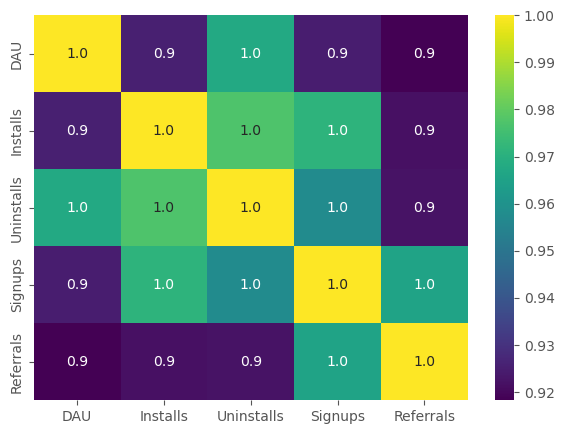

In [3]:
# correlation
correlation = data.corr()

plt.figure(figsize = (7,5), dpi = 100)
sns.heatmap(correlation, fmt ='.1f', annot = True, cmap ='viridis')
plt.show()

##### We can see that there is a strong correlation between Referrals & other Variables.

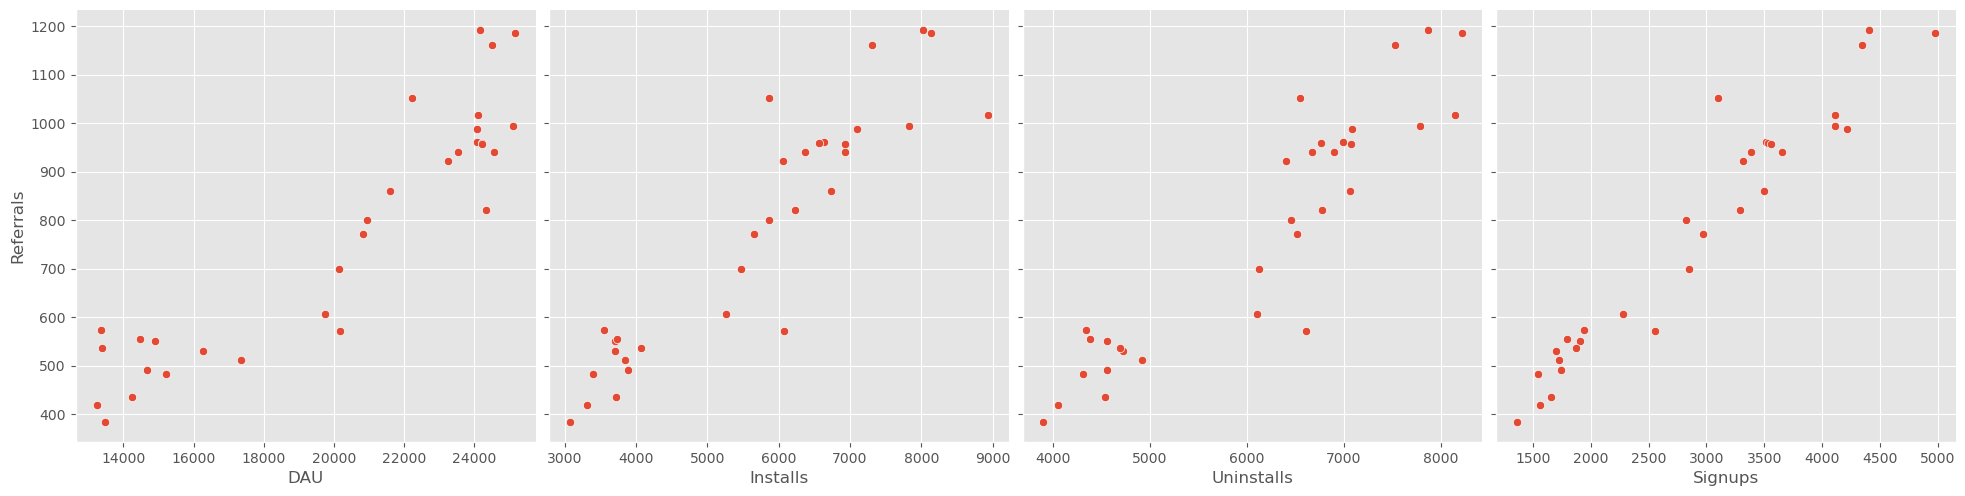

In [4]:
# checking linear relationship
sns.pairplot(data = data, x_vars = ["DAU", "Installs", "Uninstalls", "Signups"], 
                          y_vars = ["Referrals"], size = 5, kind = "scatter")  
plt.show()

#### All variables are having a linear relationship with "Referrals"

In [5]:
# creating X and y for train test split
X = data.iloc[:31, 1:5]
y = data.iloc[:31, 5:]

# creating a new df on which we'll run our final model
df = data.iloc[31:, :5]

In [6]:
# creating training and testing variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

# fitting a model on the training data
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
y_test_predictions = lm.predict(X_test)

In [7]:
# comparing our y_test with y_test_predictions

print(y_test, end = "\n\n")
print(y_test_predictions)

    Referrals
14      772.0
11     1193.0
29      573.0
25      491.0
24      435.0
2       940.0
21      530.0
28      536.0

[[ 786.78281155]
 [1072.43064174]
 [ 515.12814779]
 [ 480.62862136]
 [ 458.45851063]
 [ 978.23994423]
 [ 512.13826939]
 [ 470.01912253]]


In [8]:
# checking accuracy
r_squared = r2_score(y_test, y_test_predictions)
r_squared

0.9491425700673981

* Acccuracy of our model is 94%

In [9]:
# applying model to predict on final_df
final_predictions = model.predict(df.iloc[:,1:])  #excluding "Date" column

final_predictions

array([[469.23925583],
       [442.50843123],
       [390.52123489],
       [452.2500911 ],
       [422.83690478],
       [456.67617125],
       [420.29077985],
       [449.75038208],
       [481.27396503],
       [498.85656117],
       [519.62467972],
       [491.03322198],
       [520.32155592],
       [537.61436038],
       [662.821992  ]])

In [10]:
# creating a new column in final_df
df['Referrals'] = final_predictions.astype('int')

In [11]:
final_df = data.iloc[:31, :].append(df)
final_df

,Date,DAU,Installs,Uninstalls,Signups,Referrals
0,2022-10-01,24071,6630,6994,3511,962.0
1,2022-10-02,23548,6366,6669,3387,941.0
2,2022-10-03,24572,6936,6899,3654,940.0
3,2022-10-04,24212,6561,6766,3532,960.0
4,2022-10-05,23247,6059,6402,3315,923.0
5,2022-10-06,24330,6230,6780,3288,822.0
6,2022-10-07,24213,6925,7073,3562,957.0
7,2022-10-08,25099,7826,7790,4110,994.0
8,2022-10-09,24099,8937,8149,4114,1016.0
9,2022-10-10,25156,8139,8215,4974,1186.0


In [12]:
# exporting final_df
# final_df.to_excel("Sikka Referrals Forecasting.xlsx")